In [6]:
import numpy as np
import matplotlib.pyplot as plt
from hmlstm import HMLSTMNetwork, plot_indicators, prepare_inputs, get_text, convert_to_batches, viz_char_boundaries
import tensorflow as tf
import torch

from __future__ import print_function
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt

# %matplotlib inline
# %load_ext autoreload
# %autoreload 2

/Users/michellezhao/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/Users/michellezhao/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/michellezhao/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/michellezhao/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/michellezhao/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Users/michellezhao/anaconda3/lib/python3.6/site-packages/ip

In [18]:
np.random.seed(2)

amp = 10
w = 1
b = 20
N = 10000

x = np.arange(N)
data = np.sin(w*x + b).astype('float64')
# torch.save(data, open('traindata.pt', 'wb'))
trainX = []
trainY = []
step_size = 5
x_size = 5
y_size = 1
batch_size = 1
for batch in range(batch_size):
    batchX = []
    batchY = []
    for i in range(0, len(data)-15, step_size):
        addx = data[i:i+x_size]
        addy = data[i+x_size:i+x_size+1]
        batchX.append(addx)
        batchY.append(addy)
    trainX.append(batchX)
    trainY.append(batchY)
    
trainX = torch.from_numpy(np.array(trainX))
trainY = torch.from_numpy(np.array(trainY))


x = trainX.float()
y = trainY.float()

In [24]:
class LSTM(nn.Module): 
    def __init__(self): 

        nn.Module.__init__(self)

        self.lstm = nn.LSTM(5,10)
        self.head = nn.Linear(10,1)

    def forward(self,x): 

        outputs, states = self.lstm(x)
        #outputs = outputs.reshape(x.shape[0]*x.shape[1], -1)
        pred = self.head(outputs)
        return pred 


rnn = LSTM()


epochs = 10000
batch_size = 1
criterion = nn.MSELoss()
mean_loss = 0. 
optimizer = optim.Adam(rnn.parameters(), 1e-3)
for epoch in range(1,epochs+1): 
    optimizer.zero_grad()
    pred = rnn(x)
#     print("pred shape",pred.shape)
#     print("trainY shape:", trainY.shape)
#     shaped_pred = pred.reshape(-1,1)
    loss = criterion(abs(pred), abs(y))
#        print('loss:', loss.item())
    loss.backward()

    optimizer = optim.Adam(rnn.parameters(), 1e-3)
    optimizer.step()
    mean_loss += loss.item()


    if epoch%100 == 0: 
        print('Epoch: {} | Loss: {:.6f}'.format(epoch, mean_loss))
        mean_loss = 0
        
# print("PREDICTION", pred)
# print("ACUTAL TRAIN Y", trainY)


Epoch: 100 | Loss: 17.222247
Epoch: 200 | Loss: 7.280889
Epoch: 300 | Loss: 2.507734
Epoch: 400 | Loss: 0.256249
Epoch: 500 | Loss: 0.100562
Epoch: 600 | Loss: 0.061079
Epoch: 700 | Loss: 0.048167
Epoch: 800 | Loss: 0.042327
Epoch: 900 | Loss: 0.038710
Epoch: 1000 | Loss: 0.036422
Epoch: 1100 | Loss: 0.034796
Epoch: 1200 | Loss: 0.033242
Epoch: 1300 | Loss: 0.031688
Epoch: 1400 | Loss: 0.030197
Epoch: 1500 | Loss: 0.028726
Epoch: 1600 | Loss: 0.027248
Epoch: 1700 | Loss: 0.025889
Epoch: 1800 | Loss: 0.024551
Epoch: 1900 | Loss: 0.023308
Epoch: 2000 | Loss: 0.022184
Epoch: 2100 | Loss: 0.021191
Epoch: 2200 | Loss: 0.020361
Epoch: 2300 | Loss: 0.019583
Epoch: 2400 | Loss: 0.018779
Epoch: 2500 | Loss: 0.017967
Epoch: 2600 | Loss: 0.017181
Epoch: 2700 | Loss: 0.016450
Epoch: 2800 | Loss: 0.015776
Epoch: 2900 | Loss: 0.015152
Epoch: 3000 | Loss: 0.014564
Epoch: 3100 | Loss: 0.013991
Epoch: 3200 | Loss: 0.013491
Epoch: 3300 | Loss: 0.013059
Epoch: 3400 | Loss: 0.012680
Epoch: 3500 | Loss: 0.

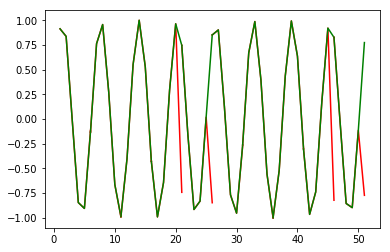

In [31]:
ss = step_size
start = 1
col = 'g'
for i in range(0,10):
    plt_x = range(start, start+ss+1)
    start = start+ss
    plt_y = np.append(trainX[0][i].numpy(),trainY[0][i].numpy())
    plt_y2 = np.append(trainX[0][i].numpy(), pred[0][i].detach().numpy())
    plt.plot(plt_x,plt_y2,'r')
    plt.plot(plt_x,plt_y, col)
#     if col == 'b':
#         col = 'g'
#     else:
#         col = 'b'
    
plt.show()

In [29]:
print(plt_y2)

[ 0.94543533  0.23666139 -0.68969794 -0.98195217 -0.3714041  -0.58641386]


In [30]:
print(plt_y)

[ 0.94543533  0.23666139 -0.68969794 -0.98195217 -0.3714041   0.58061118]
